In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 
sns.set(color_codes=True)
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
%matplotlib inline

In [4]:
# reading of insurance data
ins_data=pd.read_csv('insurance.csv')
ins_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Shape of the dataset
shape=ins_data.shape
print('Shape of data is',shape)
# datatype of each attributes
ins_data.dtypes

Shape of data is (1338, 7)


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
#Checking the presence of missing values
ins_data.isna().apply(pd.value_counts).T #There is no presence of null value

,False
age,1338
sex,1338
bmi,1338
children,1338
smoker,1338
region,1338
charges,1338


In 5 point summary of numerical attributes, the numerical attributes are BMI, Charges and Age. Age and Number of children can be a categorical data, I have assumed number of children to be categorical data and age to be numerical data


In [126]:
#5 point summary of numerical attributes(age, bmi and charges)
ins_data[["age","bmi","charges"]].describe().T


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


  - The count of all people both male and female is 1338.
  - The maximum age is 64 and the minimum age is 18, maximum bmi is 53.13 and minimum bmi is 15.96,maximum charges are 63770.428 and minimum is 1121.874.
  - The data is for people who are 18 and above.
  - The bmi of the people must be in range of 18.5 to 24.5, but the bmi mean is 30.663397,this shows many people are unfit or don't have ideal bmi.
  - The median of all three numerical attributes is less than mean,this tells it is a positive skewed/right skewed.
  - The right skeweness is more in charges column, that means most of the people are charged less than the mean charges i.e 13270.42265 

In [127]:
#Number of people charged less than the mean out of 1338 peoples 
ins_data[ins_data["charges"]<13270].count()

age         918
sex         918
bmi         918
children    918
smoker      918
region      918
charges     918
dtype: int64

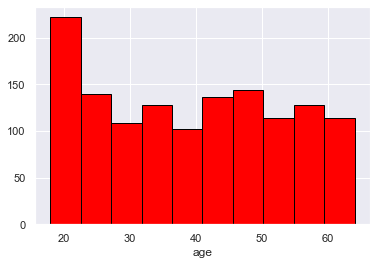

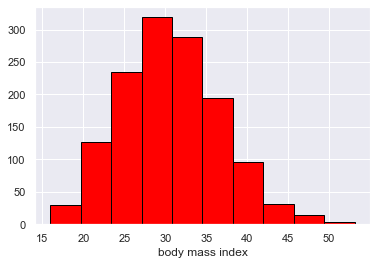

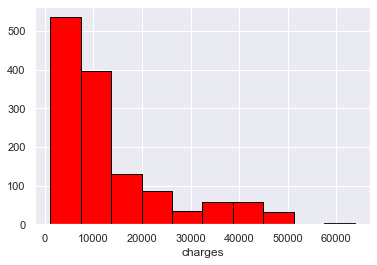

In [128]:
#Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.
plt.hist(ins_data.age, color='red', edgecolor = 'black',bins=10 )
plt.xlabel('age')
plt.show()

plt.hist(ins_data.bmi, color='red', edgecolor = 'black',bins=10)
plt.xlabel('body mass index')
plt.show()

plt.hist(ins_data.charges, color='red', edgecolor = 'black',bins=10)
plt.xlabel('charges')
plt.show()





 - We found out that the age distribution uniform, we will find out the assymetry aspect when skewness is found out.
 - Body mass index distribution "bmi" is uniform.
 - Charges distribution is right skewed(postive skewed)

In [129]:
#measurement of skeweness
sk_age=stats.skew(ins_data.age)
print('Skewness of age=',sk_age)
sk_bmi=stats.skew(ins_data.bmi)
print('Skewness of body mass index=',sk_bmi)
sk_charges=stats.skew(ins_data.charges)
print('Skewness of charges=',sk_charges)


Skewness of age= 0.055610083072599126
Skewness of body mass index= 0.28372857291709386
Skewness of charges= 1.5141797118745743


 - Skewness of age and body mass index are very less but positive, this shows the distribution is uniform.
 - The skewness of charges is more and positive, this shows it is right skewed.
 - The charges of majority people are less than the mean(right-skewed)

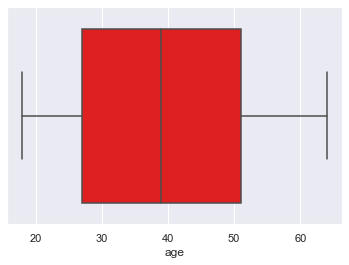

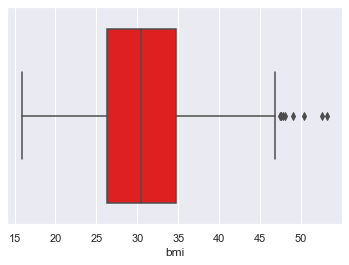

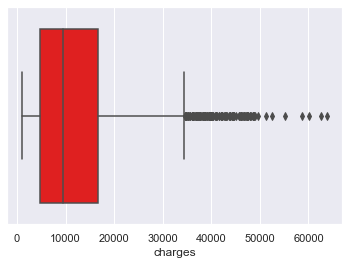

In [130]:
#Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns
sns.boxplot(x=ins_data.age,color='red')
plt.show()
sns.boxplot(x=ins_data.bmi,color='red')
plt.show()
sns.boxplot(x=ins_data.charges,color='red')
plt.show()


 - Age boxplot have no outliers that means all observation is present within the rest of the data.
 - BMI boxplot have few outliers which means some observation are present distant away from the rest of the data.
 - Charges boxplot have many outliers which means many observation are present distant away from the rest of the data.

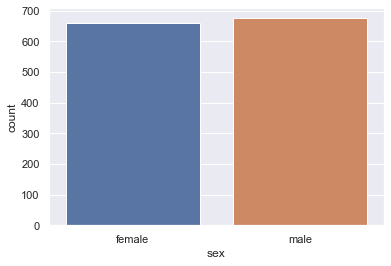

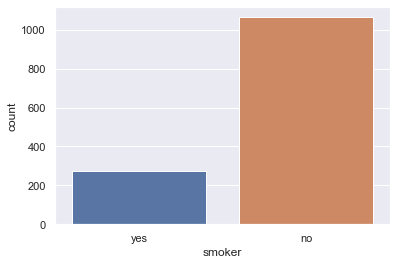

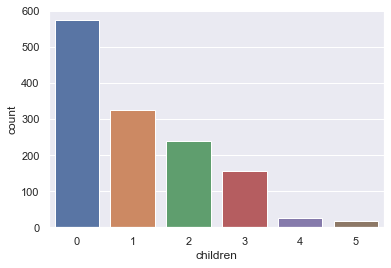

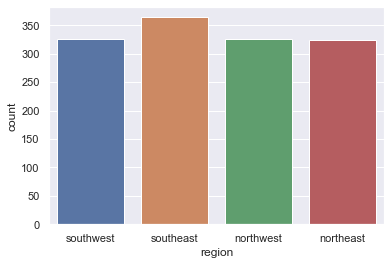

In [131]:
# Plotting categorical attributes
sns.countplot(x="sex",data=ins_data)
plt.show()
sns.countplot(x="smoker",data=ins_data)
plt.show()
sns.countplot(x="children",data=ins_data)
plt.show()
sns.countplot(x="region",data=ins_data)
plt.show()



In [132]:
# counting different categorical attributes
no_m=(ins_data["sex"]=="male").sum()
no_f=(ins_data["sex"]=="female").sum()
print('Number of males are',no_m,'Number of females',no_f)#Counting genders
no_s=(ins_data["smoker"]=="yes").sum()
no_ns=(ins_data["smoker"]=="no").sum()
print('Number of smokers are',no_s,'Number of non-smoker',no_ns)#Counting smokers
no_0=(ins_data["children"]==0).sum()
no_1=(ins_data["children"]==1).sum()
no_2=(ins_data["children"]==2).sum()
no_3=(ins_data["children"]==3).sum()
no_4=(ins_data["children"]==4).sum()
no_5=(ins_data["children"]==5).sum()
print('Number of children is zero',no_0,'Number of children is one',no_1,'Number of children is two',no_2,'Number of children is three',no_3,'Number of children is four',no_4,'Number of children is five',no_5)
no_sw=(ins_data["region"]=='southwest').sum()
no_se=(ins_data["region"]=='southeast').sum()
no_nw=(ins_data["region"]=='northwest').sum()
no_ne=(ins_data["region"]=='northeast').sum()
print('Southwest',no_sw,'Southeast',no_se,'Northwest',no_nw,'Northeast',no_ne)


Number of males are 676 Number of females 662
Number of smokers are 274 Number of non-smoker 1064
Number of children is zero 574 Number of children is one 324 Number of children is two 240 Number of children is three 157 Number of children is four 25 Number of children is five 18
Southwest 325 Southeast 364 Northwest 325 Northeast 324


 - The number of male is higher than female
 - The number of smokers are very less as compared to non smokers
 - The number of people having no children is very high
 - People from each parts of USA are there but southeast people are more

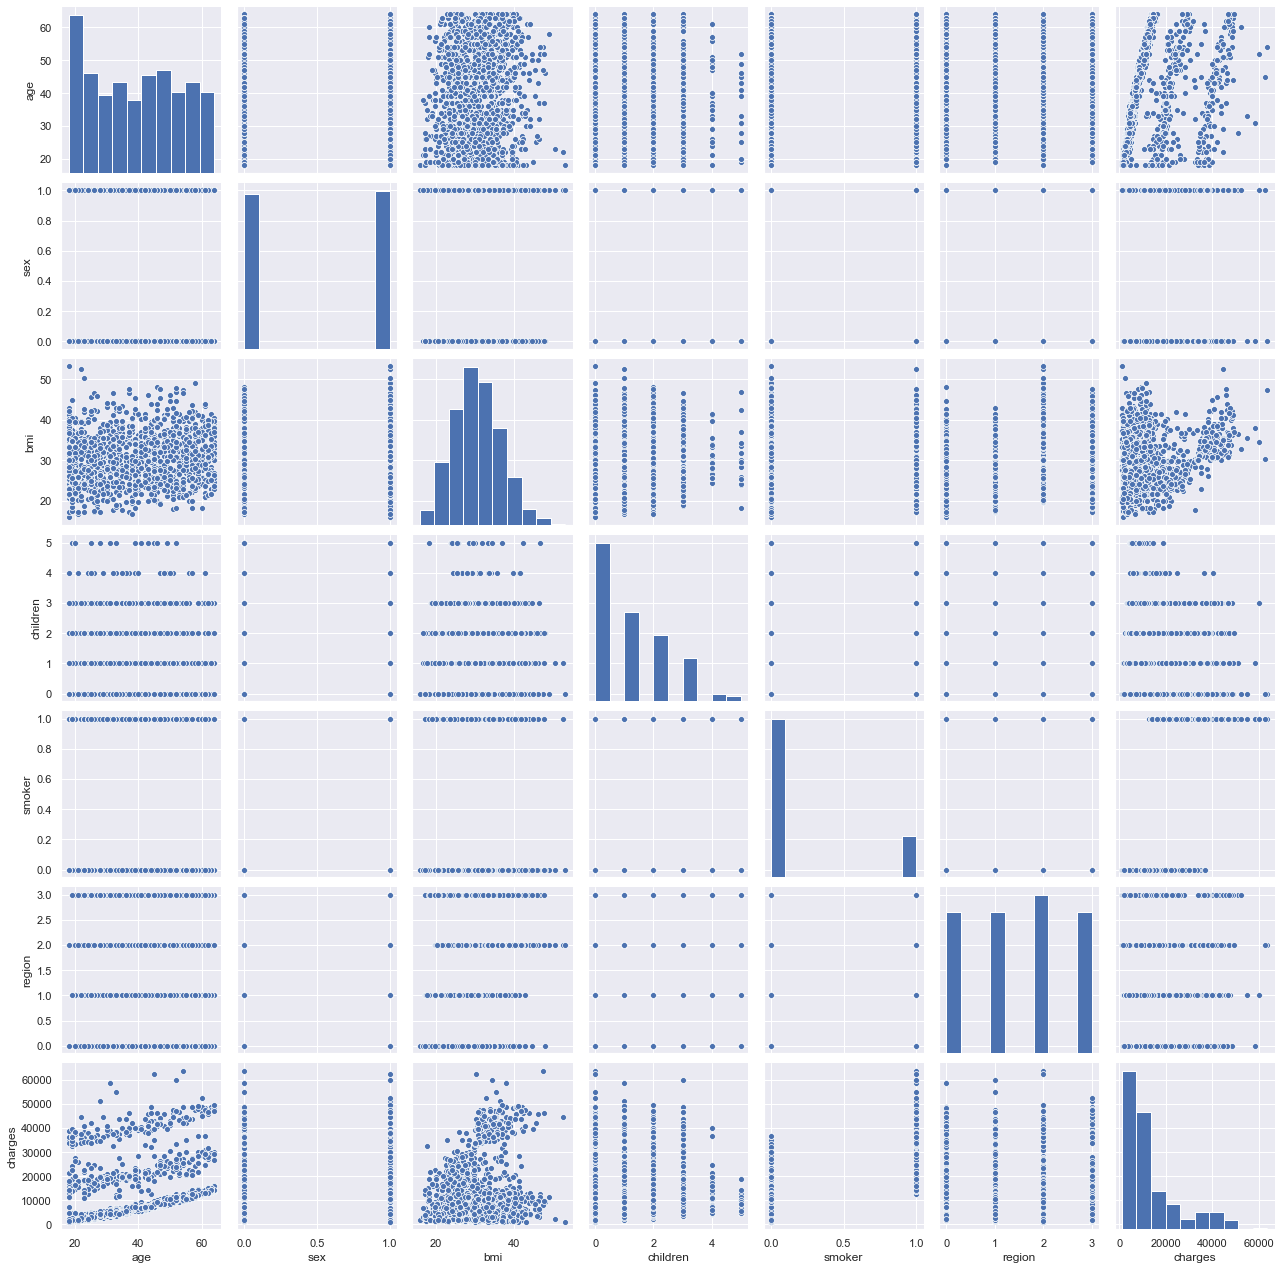

In [23]:
#Pair plot that includes all the columns of the data frame
sns.pairplot(ins_data);
plt.show();

 - Although the smokers are less in number but the charges by smokers are higher than non smokers
 - People who don't have children are more likely to smoke.
 - Old age people are charging more.

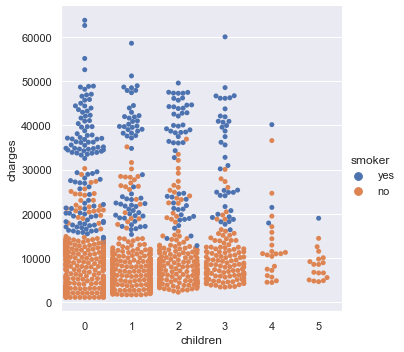

In [136]:
#Do charges of people who smoke differ significantly from the people who don't?
sns.catplot(x="children", y="charges", kind="swarm", hue="smoker",data=ins_data);

 - Hence, we found that the charges of smokers are high and non smokers are less.
 - People who have no children have high tendency to smoke as compared to the people having children.

In [24]:
#Does bmi of males differ significantly from that of females?
#t test is done on this question 
H0='Sex does not affect the bmi value' #stating null hypothesis
H1='Sex does affect the bmi value'# stating alternative hypothesis
female= ins_data[ins_data['sex'] == 'female']
male= ins_data[ins_data['sex'] == 'male']
x=pd.Series(ins_data[ins_data['sex'] == 'male'].bmi)
y=pd.Series(ins_data[ins_data['sex'] == 'female'].bmi)
t, p_value  = stats.ttest_ind(x,y)
print('The t value is',t,'The p value is',p_value)
if p_value < 0.05:  # Setting confidence level is 95%
    print(f'{H1} as the p_value ({p_value.round(5)}) < 0.05')
else:
    print(f'{H0} as the p_value ({p_value.round(5)}) > 0.05')

The t value is nan The p value is nan


AttributeError: 'float' object has no attribute 'round'

 - There is no significant difference between males and females when bmi is considered

In [ ]:
# Is the proportion of smokers significantly different in different genders?
H0='The proportion of smokers are equal in different genders'#null hypothesis
H1='The proportion of smokers are not equal in different genders'#alternate hypothesis
female_smokers=ins_data[ins_data['sex']=='female'].smoker.value_counts()[1]#female smokers
male_smokers=ins_data[ins_data['sex']=='male'].smoker.value_counts()[1]#male smokers
n_female=ins_data.sex.value_counts()[1]#number of female
n_male=ins_data.sex.value_counts()[0]#number of male
print(f' Proportion of smokers in females, males = {round(female_smokers/n_female,2)}, {round(male_smokers/n_male,2)} respectively')
#Performing proportional z test
from statsmodels.stats.proportion import proportions_ztest
stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_female, n_male])
print(stat,'p value is',pval)
if pval < 0.05:
    print(f'{H1} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{H0} as the p_value ({p_value.round(3)}) < 0.05')


 - The proportion of smokers are not equal in different genders

In [189]:
#Is the distribution of bmi across women with no children, one child and two children, the same?
H0 = "Number of children has no effect on bmi"   # Stating the Null Hypothesis
H1 = "Number of children has an effect on bmi"   # Stating the Alternate Hypothesis
female_dt=ins_data[ins_data['sex']=='female'].bmi
zero=female_dt[ins_data.children==0]
one=female_dt[ins_data.children==1]
two=female_dt[ins_data.children==2]
f_stat,p_value=stats.f_oneway(zero,one,two)
print(f_stat,p_value)
if p_value<0.05: #confidence interval 95%
    print(f'{H1} as the pvalue({p_value.round(5)})<0.05')
else:
    print(f'{H0} as the pvalue({p_value.round(5)})>0.05')

0.3344720147757968 0.7158579926754841
Number of children has no effect on bmi as the pvalue(0.71586)>0.05


 - The number of children of female does not effect the bmi value